<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

In [4]:
#pip install seaborn

## Import package

In [5]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [7]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [8]:
#1
#Import dataset from sklearn
sk_iris = datasets.load_iris()
#Si besoin
iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

In [10]:
iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
2,4.7,3.2,1.3,0.2,0.0
43,5.0,3.5,1.6,0.6,0.0
23,5.1,3.3,1.7,0.5,0.0
125,7.2,3.2,6.0,1.8,2.0
84,5.4,3.0,4.5,1.5,1.0


#### 2) Statistiques descriptives

In [ ]:
#Tester pygwalker si vous avez le temps

In [11]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### 3) Recoder variables, si besoin

In [12]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species              float64
dtype: object

### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [13]:
iris_2_species = iris[iris['species'].isin([0, 1])]

In [15]:
iris_2_species.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
81,5.5,2.4,3.7,1.0,1.0
45,4.8,3.0,1.4,0.3,0.0
38,4.4,3.0,1.3,0.2,0.0
18,5.7,3.8,1.7,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
0,5.1,3.5,1.4,0.2,0.0
26,5.0,3.4,1.6,0.4,0.0
90,5.5,2.6,4.4,1.2,1.0
72,6.3,2.5,4.9,1.5,1.0
56,6.3,3.3,4.7,1.6,1.0


#### 4) Découper data set en train et test

In [16]:
#Definition des features
X = iris_2_species.iloc[:, [0, 1]]
y = iris_2_species['species']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 5) Importer les modules pour la modélisation

In [1431]:
#... au début du code

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

In [18]:
# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Entraîner le modèle SVM avec SVC
svm_clf = SVC(kernel='linear', C=1)  
svm_clf.fit(X_train, y_train)

# Prédictions
y_pred = svm_clf.predict(X_test)

Text(0.5, 1.0, 'Frontière de décision SVM')

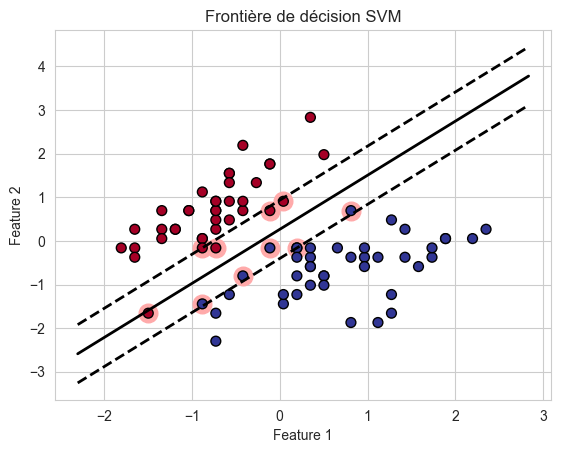

In [19]:
# Visualiser la frontière de décision
plot_svc_decision_boundary(svm_clf, X_train.min(), X_train.max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision SVM')

### Faire varier le critère de régularisation C

Text(0.5, 1.0, 'Frontière de décision SVM')

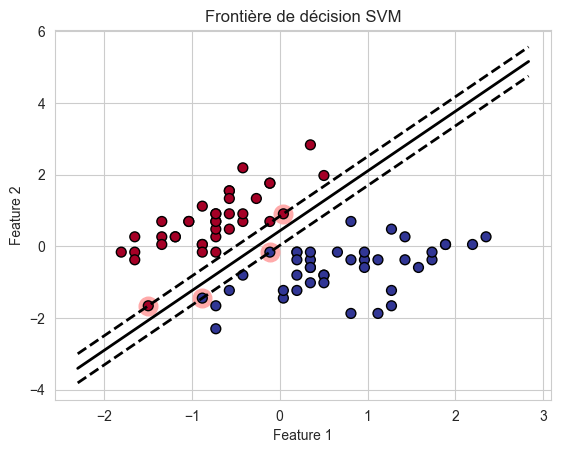

In [20]:
# Entraîner le modèle SVM avec SVC
svm_clf = SVC(kernel='linear', C=20)  
svm_clf.fit(X_train, y_train)

# Prédictions
y_pred = svm_clf.predict(X_test)

#Visualisation
plot_svc_decision_boundary(svm_clf, X_train.min(), X_train.max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision SVM')

##### Commenter l'effet de C

In [ ]:
Plus C augmente, plus les marges diminue ainsi, il y a moins de point support

#### Changer de paire de feature

Text(0.5, 1.0, 'Frontière de décision SVM')

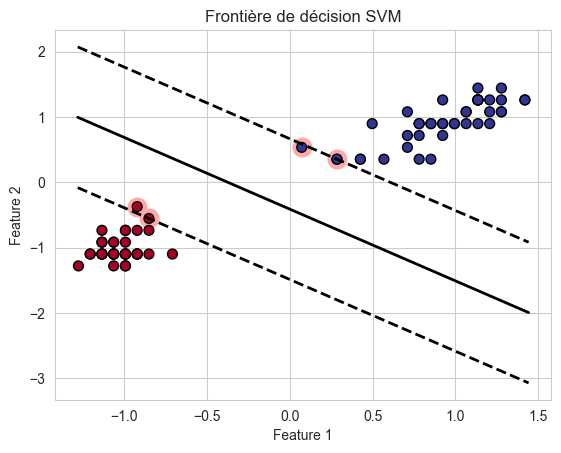

In [21]:
#Nouvelle paire
X = iris_2_species.iloc[:, [2, 3]]

#Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Entraîner le modèle SVM avec SVC
svm_clf = SVC(kernel='linear', C=1)  
svm_clf.fit(X_train, y_train)

# Prédictions
y_pred = svm_clf.predict(X_test)

# Visualiser la frontière de décision
plot_svc_decision_boundary(svm_clf, X_train.min(), X_train.max())
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontière de décision SVM')

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [22]:
plante = pd.read_csv("/Users/rododo/cours_iae/01_SVM/td/data/iris_noise.csv", sep = ";")

In [23]:
plante.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,5.858095,3.062857,3.772381,1.202381,1.000000
std,0.837035,0.443509,1.767516,0.755676,0.818448
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.400000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Modélisation binaire, 2 target

In [24]:
#Sélection de 2 espéces
plante_binaire = plante[plante['species'].isin([0, 1])]

In [25]:
# Séparer les variables explicatives et la cible
X = plante_binaire.iloc[:, [1, 2]]
y = plante_binaire['species']

In [26]:
#Standardisation des données
scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

In [27]:
# Diviser le dataset en train et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_standar, y, test_size=0.2, random_state=42)

In [28]:
# Initialisation des modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVC': LinearSVC(),
    'SVC': SVC(),
    'SGDClassifier': SGDClassifier()
}

# Cross-validation sur les modèles
for model_name, model in models.items():
    print(f"Évaluation du modèle {model_name}:")
    scores_5 = cross_val_score(model, X_train, y_train, cv=5)
    mean_5 = scores_5.mean()
    std_5 = scores_5.std()
    scores_10 = cross_val_score(model, X_train, y_train, cv=10)
    mean_10 = scores_10.mean()
    std_10 = scores_10.std()
    print(f"  - Précision moyenne globale: {(mean_5 + mean_10) / 2:.4f}")
    print(f"  - Robustesse (écart-type moyen): {(std_5 + std_10) / 2:.4f}\n")    

Évaluation du modèle Logistic Regression:
  - Précision moyenne globale: 0.8656
  - Robustesse (écart-type moyen): 0.0742

Évaluation du modèle Linear SVC:
  - Précision moyenne globale: 0.8656
  - Robustesse (écart-type moyen): 0.0742

Évaluation du modèle SVC:
  - Précision moyenne globale: 0.8565
  - Robustesse (écart-type moyen): 0.0831

Évaluation du modèle SGDClassifier:
  - Précision moyenne globale: 0.8082
  - Robustesse (écart-type moyen): 0.1200



#### Choix du modèle, justification



Nous décidons de choisir le 3eme modèle car étant le plus performant aussi bien au niveau de la précision que de la robustesse et également car étant le plus simple. 

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [29]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [30]:
#Evalution des meilleurs paramétres
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid.best_params_)

Meilleurs paramètres : {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [31]:
# Évaluation finale
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.79      0.92      0.85        12

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.87      0.86      0.86        28



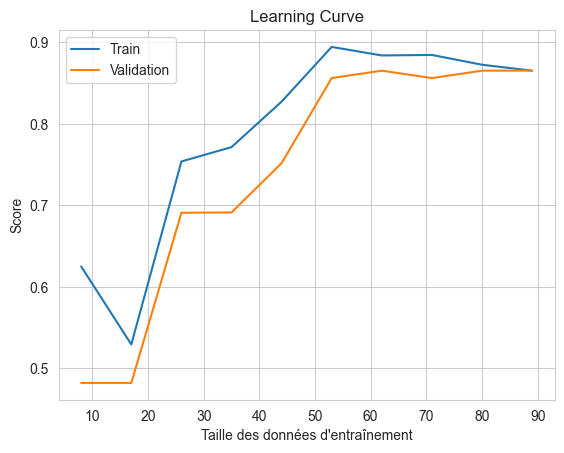

In [32]:
#Visualisation de l'apprentissage du modéle  
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)
)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.xlabel("Taille des données d'entraînement")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.show()

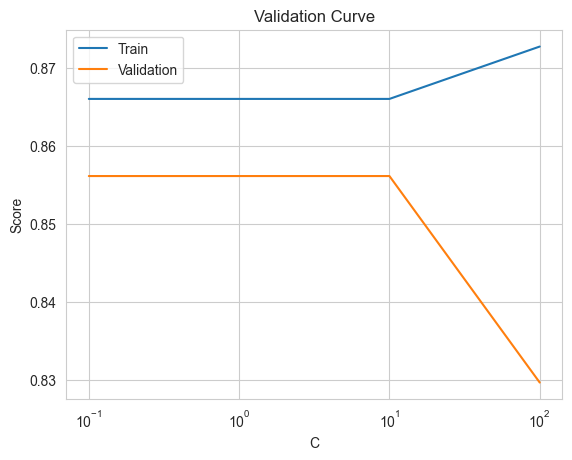

In [33]:
#Bonne library
from sklearn.model_selection import validation_curve
#Influence des paramétres
param_range = [0.1, 1, 10, 100]
train_scores, val_scores = validation_curve(
    SVC(), X_train, y_train, param_name='C', param_range=param_range, cv=5
)
plt.plot(param_range, train_scores.mean(axis=1), label='Train')
plt.plot(param_range, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.xlabel("C")
plt.ylabel("Score")
plt.title("Validation Curve")
plt.xscale("log")
plt.show()

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [34]:
# Entraîner le modèle
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)

# Résultats
print("Score d’entraînement :", final_model.score(X_train, y_train))
print("Score de validation :", final_model.score(X_test, y_test))

Score d’entraînement : 0.8660714285714286
Score de validation : 0.8571428571428571


##### Commenter la qualité de prédiction



Le modèle que nous observons possède un score de 86,6% sur le jeu d'entraînement. Nous indiquant dès lors que les relations présentes dans les données sont bien prises en compte. Tandis que pour le jeu de validation, le score est de 85,7%, nous démontrant quand même une bonne généralisation du modèle à des données non vues pendant l'entraînement. Ces scores nous indique alors que notre modéle subit ni d'overfitting ou d'underfitting.

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.79      0.92      0.85        12

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.87      0.86      0.86        28



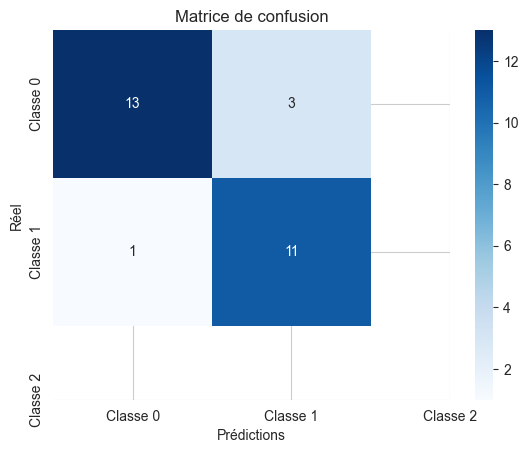

In [35]:
#Prediction out sample
y_pred_out = final_model.predict(X_test)

#Evaluation de la performance
print("Rapport de classification :")
print(classification_report(y_test, y_pred_out))

#Evaluation en plus de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred_out)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1','Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()


#### Performance in et out sample

Rapport de classification :
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.85      0.90      0.87        58

    accuracy                           0.87       112
   macro avg       0.87      0.86      0.87       112
weighted avg       0.87      0.87      0.87       112



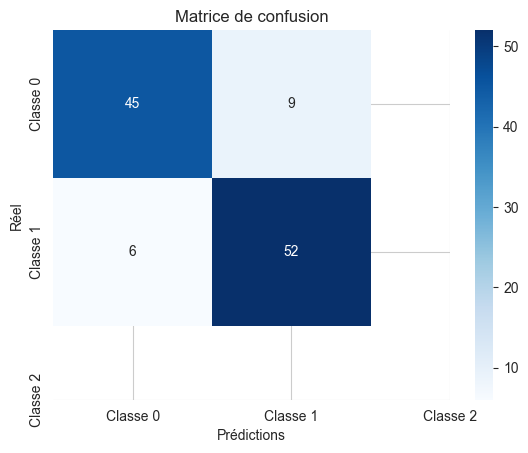

In [36]:
#Prediction in sample
y_pred_in = final_model.predict(X_train)

#Evaluation de la performance
print("Rapport de classification :")
print(classification_report(y_train, y_pred_in))

#Evaluation en plus de la matrice de confusion
confusion = confusion_matrix(y_train, y_pred_in)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1','Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

Notre modèle ne semble pas trés performant. 

## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [48]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
2,4.7,3.2,1.3,0.2,0
62,6.0,2.2,4.0,1.0,1
21,5.1,3.7,1.5,0.4,0
1,4.9,3.0,1.4,0.2,0
117,7.7,3.8,6.7,2.2,2


#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

In [50]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# SVM OVO
ovo_svm = SVC(decision_function_shape='ovo')
ovo_svm.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_ovo = ovo_svm.predict(X_test)
print("Rapport de classification :")
print(classification_report(y_test, y_pred_ovo))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.94      0.89      0.92        19

    accuracy                           0.89        28
   macro avg       0.87      0.89      0.88        28
weighted avg       0.90      0.89      0.89        28



In [51]:
# SVM OVR
ovr_svm = SVC(decision_function_shape='ovr')
ovr_svm.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_ovr = ovr_svm.predict(X_test)
print("Rapport de classification :")
print(classification_report(y_test, y_pred_ovr))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.94      0.89      0.92        19

    accuracy                           0.89        28
   macro avg       0.87      0.89      0.88        28
weighted avg       0.90      0.89      0.89        28



3) Existe-t-il des différences entre OVO et OVR?

Il ne semble avoir avoir aucune différence entre ces deux modèles. (OVR et OVO)

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>